In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import numpy as np
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [16]:
df = pd.read_csv("loans_full_schema.csv")

In [40]:
df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,int_round
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,14
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,13
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,17
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,7
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0,7
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0,19
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0,24
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0,5


C:\Users\sriva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency Distribuition of Loan Amount')

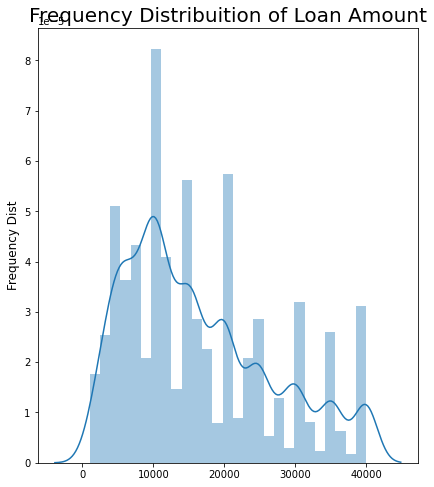

In [17]:
plt.figure(figsize=(15,8))

plt.subplot(121)
g = sns.distplot(df["loan_amount"])
g.set_xlabel("", fontsize=12)
g.set_ylabel("Frequency Dist", fontsize=12)
g.set_title("Frequency Distribuition of Loan Amount", fontsize=20)

Text(0.5, 1.0, 'Interest Rate Normal Distribuition')

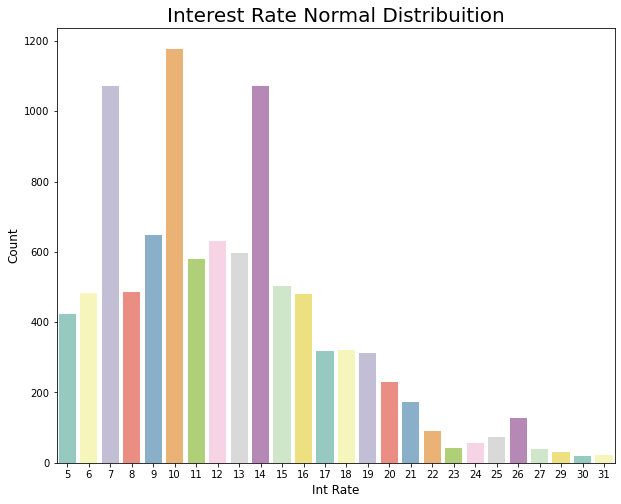

In [20]:
df['int_round'] = df['interest_rate'].round(0).astype(int)

plt.figure(figsize = (10,8))
g1 = sns.countplot(x="int_round",data=df, 
                   palette="Set3")
g1.set_xlabel("Int Rate", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Interest Rate Normal Distribuition", fontsize=20)

Text(0.5, 1.0, 'Interest Rate by Homeownership')

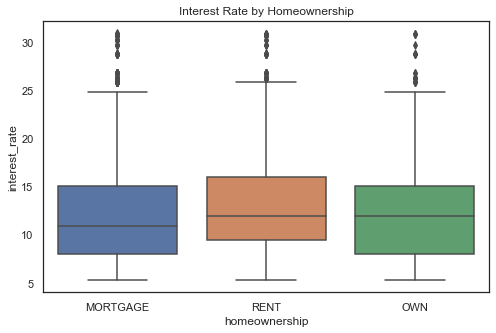

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x='homeownership',y='interest_rate',data=df)
plt.title("Interest Rate by Homeownership")

Text(0.5, 1.0, 'Interest Rate by Loan Purpose')

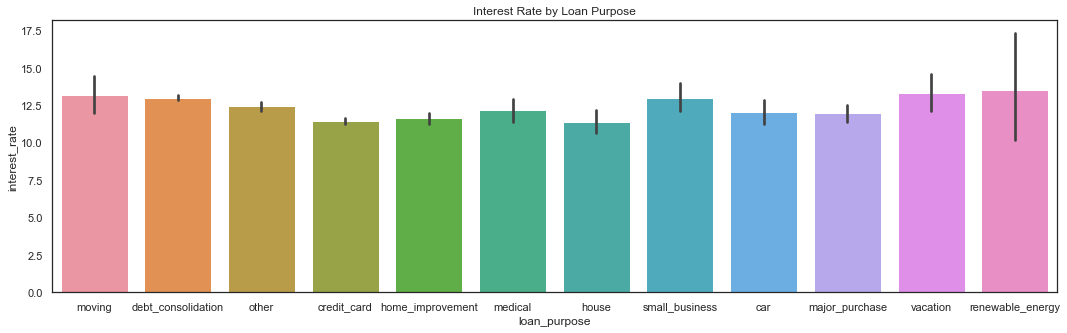

In [41]:
plt.figure(figsize=(18,5))
sns.barplot(x='loan_purpose',y='interest_rate',data=df)
plt.title("Interest Rate by Loan Purpose")

Text(0.5, 1.0, 'Interest Rate by Verified Income')

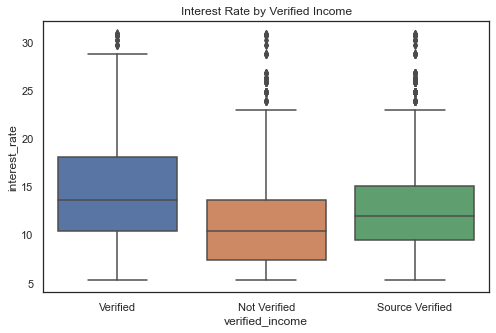

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(x='verified_income',y='interest_rate',data=df)
plt.title("Interest Rate by Verified Income")

In [4]:
nan_cols = ['emp_length', 'annual_income_joint', 'debt_to_income_joint', 'debt_to_income', 'months_since_last_delinq', 
                 'months_since_90d_late', 'months_since_last_credit_inquiry', 'num_accounts_120d_past_due']
df[nan_cols] = df[nan_cols].fillna(0)

In [5]:
columns=['emp_length', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'annual_income_joint',
       'verification_income_joint', 'debt_to_income_joint', 'delinq_2y',
       'months_since_last_delinq', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt',
        'application_type',
       'interest_rate', 'installment',
       'balance', 'paid_total', 'paid_principal', 'paid_interest',
       'paid_late_fees']

In [6]:
df = df[columns]
df_final = pd.get_dummies(df)

In [7]:
X=df_final.drop("interest_rate", axis=1)
y=df_final['interest_rate']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [11]:
def evaluate(model,X_train,X_test,Y_train,Y_test):
    
    model.fit(X_train,Y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)    
    errors_train = abs(predictions_train - Y_train)
    errors_test = abs(predictions_test - Y_test)
    
    mape_train = 100 * np.mean(errors_train / Y_train)
    mape_test = 100 * np.mean(errors_test / Y_test)
    
    accuracy_train = 100 - mape_train
    accuracy_test = 100 - mape_test
    print('Model Performance')
    
    print('Accuracy(Train Data) = {:0.2f}%.'.format(accuracy_train))
    print('Accuracy(Test Data) = {:0.2f}%.'.format(accuracy_test))
    plt.figure(figsize = (10,10))
    plt.scatter(predictions_train,(predictions_train - Y_train),c='g',s=40,alpha=0.5)
    plt.scatter(predictions_test,(predictions_test - Y_test),c='b',s=40,alpha=0.5)
    plt.hlines(y=0,xmin=0,xmax=30)
    plt.title('residual plot: Blue - test data and Green - train data')
    plt.ylabel('residuals')
    return accuracy_train,accuracy_test

C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33922.0760588097, tolerance: 14.793962025785001
  model = cd_fast.enet_coordinate_descent(
C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33258.72105379072, tolerance: 14.835106197918336
  model = cd_fast.enet_coordinate_descent(
C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33554.35536621532, tolerance: 14.728733063193335
  model = cd_fast.enet_coordinate_descent(
C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

Model Performance
Accuracy(Train Data) = 76.98%.
Accuracy(Test Data) = 76.60%.


C:\Users\sriva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42446.598492628975, tolerance: 18.635427925998666
  model = cd_fast.enet_coordinate_descent(


(76.98073926199922, 76.59778449181995)

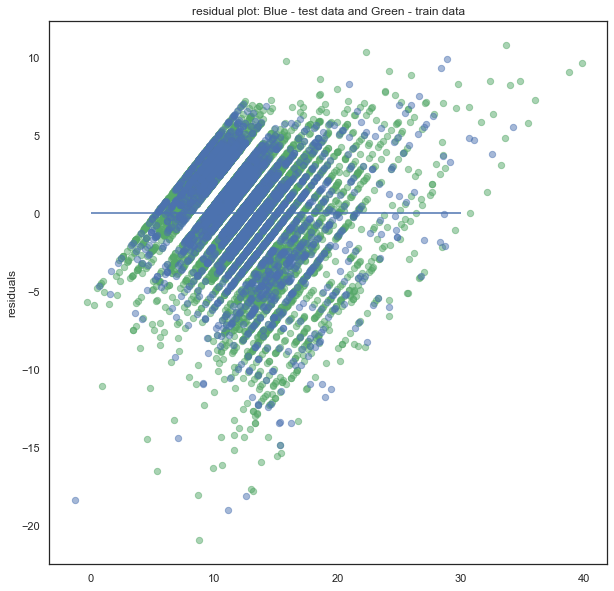

In [39]:
param_lasso = {'alpha' : [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}
lasso_reg = Lasso()
lasso_grid = GridSearchCV(lasso_reg, param_lasso, cv = 5)
evaluate(lasso_grid,X_train, X_test, y_train, y_test)

Model Performance
Accuracy(Train Data) = 96.81%.
Accuracy(Test Data) = 92.24%.


(96.80721874308396, 92.24167231917363)

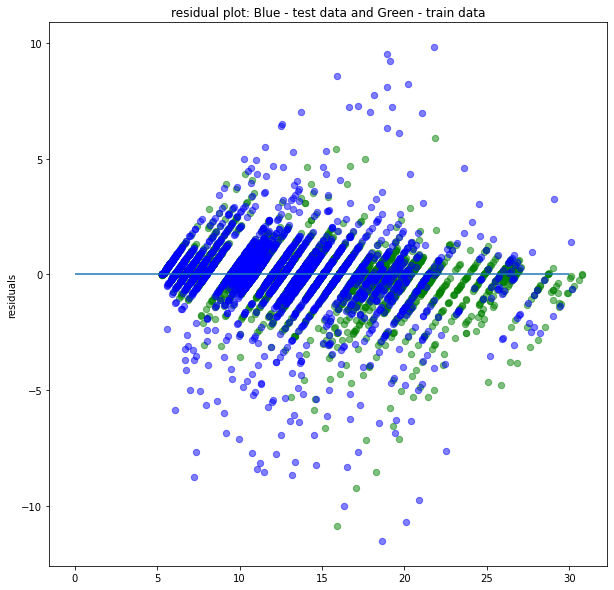

In [13]:
model = RandomForestRegressor(n_estimators= 10, random_state=42)
evaluate(model,X_train, X_test, y_train, y_test)